# Misja: Winiarz potrzebuje pomocy!
W okolicach Wrocławia, na zboczach malowniczych wzgórz niedaleko Sobótki, działa pewien mały rodzinny winiarz.

Nazywa się pan Roman. Ma swoją niewielką winnicę, tradycyjną piwniczkę i dużo pasji..., ale mało nowoczesnego sprzętu.

Niedawno skontaktował się z nim duży klient z Włoch - **Deliziosi vini di Linguini**, który spróbował jego wina podczas wizyty na jarmarku we Wrocławiu.

> "Panie Romanie, my chcemy zamówić kilka beczek... ale pod jednym warunkiem: musi Pan podać nam dokładne zasolenie wina - bo to ma kluczowe znaczenie dla naszego kupażu."

Pan Roman się zmartwił, bo ma sprzęt tylko do mierzenia kwaśności... ale zgłosił się **do was**! Pomożecie mu?

Znalazł gdzieś dane z internetu o winach. Spróbuj zobaczyć co w nich jest!

In [1]:
!pip install kagglehub

In [2]:
import kagglehub
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import itertools

dataset = kagglehub.dataset_download('uciml/red-wine-quality-cortez-et-al-2009')
dataset_path = Path(dataset)
csv_files = list(dataset_path.glob("*.csv"))

df = pd.read_csv(csv_files[0]).dropna()
# TODO: Wyświetl kolumny tego zbioru danych

# TODO: zobacz 5 pierwszych rekordów


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Super! Udało nam się zobaczyć jak ten zbiór danych wygląda! Widzimy, że są tam kolumny o nazwach `chlorides` oraz `fixed acidity` - te, których akurat szukamy!

Spróbuj jak na wykładzie użyć `LinearRegression` z biblioteki `sklearn`, żeby zobaczyć jakiej funkcji liniowej może użyć pan Roman żeby sprawdzić jaką kwasowość mają jego wina

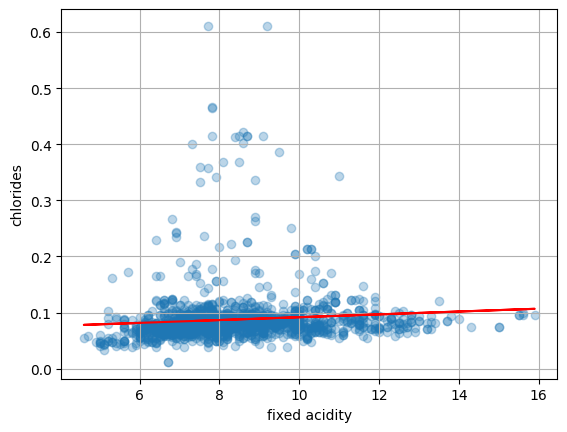

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# TODO: Wyciągnij kolumny które potrzebujemy
X = ...
y = ...

# TODO: Stwórz model
model = ...

# TODO: Wytrenuj go
...

# TODO: Zobacz jak wygląda prosta
y_pred = ...

plt.scatter(X, y, alpha=0.3)
plt.plot(X, y_pred, color='red')
plt.xlabel("fixed acidity")
plt.ylabel("chlorides")
plt.grid(True)
plt.show()

> "Wow! Niesamowite! Masz talent do tych rzeczy"
> 
Powiedział pan Roman. 
> "Czy chciałbyś znaleźć dla mnie jeszcze kilka ciekawych zależności między danymi?"

In [4]:
# TODO: Zrób to samo, ale z innymi kolumnami! Może znajdziesz coś ciekawego dla pana Romana!


# Zadanie 2 (z gwiazdką): Zrób to sam
Spróbuj napisać regresję sam za pomocą mnożenia macierzy - według wzorku z wykładu

In [5]:
import numpy as np

# Wyciągamy dane
X_raw = df[['chlorides']].values  # cecha
y = df[['fixed acidity']].values  # zmienna do przewidzenia

# 1. Dodaj kolumnę jedynek (bias)
X = np.hstack([np.ones((X_raw.shape[0], 1)), X_raw])  # macierz wejściowa: [1, x]

# 2. Oblicz macierze do wzoru:
XTX = ...            # X transponowane razy X
XTX_inv = ...        # odwrotność tej macierzy
XTy = ...            # X transponowane razy y
beta = ...           # końcowy wynik: współczynniki regresji

# 3. Rozpakuj współczynniki
b = ...              # wyraz wolny
a = ...              # współczynnik przy x

print(f"y = {a:.4f} * x + {b:.4f}")

Ręcznie policzona regresja: y = 0.0025 * x + 0.0664


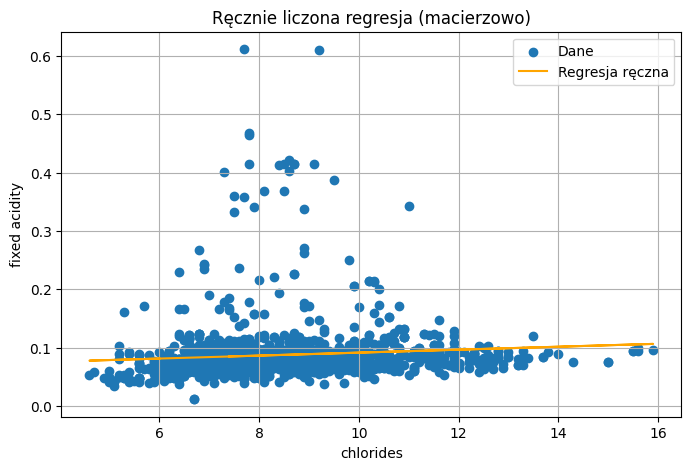

In [6]:
import matplotlib.pyplot as plt

y_pred = ...  # przewidywane wartości na podstawie modelu

plt.figure(figsize=(8, 5))
plt.scatter(X_raw, y, alpha=0.3, label="Dane")
plt.plot(X_raw, y_pred, color='green', label="Regresja ręczna")
plt.xlabel("chlorides")
plt.ylabel("fixed acidity")
plt.title("Ręcznie policzona regresja liniowa")
plt.legend()
plt.grid(True)
plt.show()